# Logistic Regression 

Implement logistic regression and apply it to two
different datasets. \

**Task Overview:**
- Logistic Regression 
- Regularized logistic regression

## 1 - Logistic Regression ##
### 1.1 Packages

Import useful packages for scientific computing and data processing. 

**Tasks:**
1. Import numpy and rename it to np.
2. Import pandas and rename it to pd.
3. Import the pyplot function in the libraray of matplotlib and rename it to plt.

In [ ]:
# Import and rename libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import pylab

### 1.2 - Data Preparation ##

Prepare the data for regression task. 

**Tasks:**
1. Load data for logistic regression.
2. Generate the scatter plot of the data.

  The data file is "data_logistic.csv"

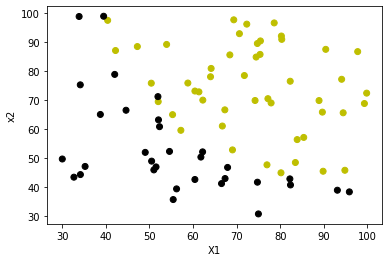

In [ ]:
# Preprocess input data and generate plots
data = pd.read_csv('data_logistic.csv')
x1 = data.iloc[:, 0]
x2 = data.iloc[:, 1]
y = data.iloc[:, 2]

colors = np.where(y==1,'y','k')

plt.xlabel('X1')
plt.ylabel('x2')
plt.scatter(x1, x2, c=colors)
plt.show()

### 1.3 - Sigmoid function ##


Implement sigmoid function so it can be called by the rest of your program.

**Tasks:**
1. Implement the sigmoid function (**def sigmoid(z):**). 
2. Test the sigmoid function by function plotting with test data (X, Y) where Y = sigmoid(X). 


In [ ]:
# Implement sigmoid fuction
def sigmoid(z):
  s = 1 / (1 + np.exp(-z))
  return s

X = np.linspace(-5, 5, 1000) 
Y = sigmoid(X)

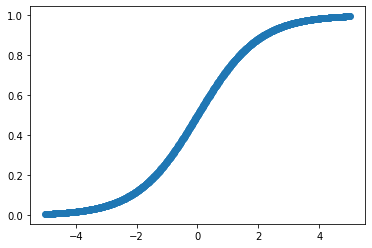

In [ ]:
# Plot data
plt.scatter(X, Y)
plt.show()


### 1.4 - Cost function and gradient ##

Implement the cross entropy cost function and its gradient for logistic regression.

**Tasks:**
1. Implement the "cal_cost" to compute the cost.
2. Implement the "cal_grad" to compute the gradients.
3. Test "cal_cost" and "cal_grad" with initial values and print out the results.

    **Expected outputs:**\
    Cost at initial theta : 0.6931471805599445\
    Gradient at inital theta : [-0.1        -10.91242026 -11.73652937]


In [ ]:
# Implement the cost function 
theta = np.array(np.zeros(3))
X = np.array([np.ones(80), x1, x2])

def cal_cost(theta, X, y):  
   m = len(y)
   eps = 1e-15
   htheta = sigmoid(np.dot(theta, X))
   term1 = np.dot(np.log(htheta), y)
   term2 = np.dot(np.log(1-htheta + eps), (1-y))
   return - (term1 + term2) / m 


############################################
def cal_grad(theta, X, y):
  m = len(y)
  htheta = sigmoid(np.dot(theta, X))
  term1 = np.dot((htheta - y), np.transpose(X))
  grad = term1 / m
  return grad
    
    
print ("Cost at inital theta:\n ", str(cal_cost(theta, X, y)))
print ("Gradient at inital theta:\n", str(cal_grad(theta, X, y)))


Cost at inital theta:
  0.6931471805599445
Gradient at inital theta:
 [ -0.1        -10.91242026 -11.73652937]


## 1.5 Train parameters with Gradient Descent ##


Train parameters using Gradient Descent. 

**Tasks:**
1. Calculate best fit theta by Gradient Descent with learning rate of **0.001** and epoch of **800K**. The initial theta from above blocks is used as initial values.
2. Print out the best theta (the last one is considered as the best here) and its corresponding cost.
3. Plot the decision boundary.

The validation of first 5 epochs (updated theta and cost): \
------Epoch 0------\
Theta: [0.0001     0.01091242 0.01173653]\
Cost: 0.6996118077359638\
------Epoch 1------\
Theta: [-0.0001129   0.00053949  0.00229352]\
Cost: 0.6649331468590681\
------Epoch 2------\
Theta: [-5.93604956e-05  8.33145873e-03  1.07754324e-02]\
Cost: 0.6679914364992459\
------Epoch 3------\
Theta: [-0.0002356   0.0004607   0.00370829]\
Cost: 0.6545873034874964\
------Epoch 4------\
Theta: [-0.00020363  0.00683227  0.01065138]\
Cost: 0.6563302142684528


In [ ]:
# Gradient Descent Implementation
L = 0.001  #learning rate
epochs = 800000  #the number of iterations to perform gradient descent

# Performing Gradient Descent 
for i in range(epochs):
    theta = theta - L * cal_grad(theta, X, y)
    if i < 5:
      print("---Epoch#", i)
      print("Theta: ", str(theta))
      print("Cost at inital theta: ", str(cal_cost(theta, X, y)))

cost = cal_cost(theta, X, y)
print("Theta: ", str(theta))
print("Cost at inital theta: ", cost)


Theta:  [0.0001     0.01091242 0.01173653]
Cost at inital theta:  0.6996118077359637
Theta:  [-0.0001129   0.00053949  0.00229352]
Cost at inital theta:  0.6649331468590681
Theta:  [-5.93604956e-05  8.33145873e-03  1.07754324e-02]
Cost at inital theta:  0.667991436499246
Theta:  [-0.0002356   0.0004607   0.00370829]
Cost at inital theta:  0.6545873034874964
Theta:  [-0.00020363  0.00683227  0.01065138]
Cost at inital theta:  0.6563302142684527
Theta:  [-13.38180064   0.10550175   0.11154862]
Cost at inital theta:  0.2761699482595887


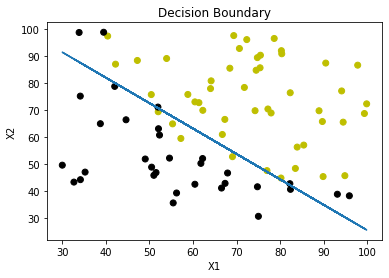

In [ ]:
# Draw Decision Boundary Here
plt.title('Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')

z = -(theta[0] + theta[1]*x1)/theta[2]
plt.plot(x1, z)

plt.scatter(x1, x2, c=colors)
plt.show()


### 1.6 Evaluating Logistic Regression

Evaluate the model with given data.

**Tasks:**
1. Evaluate the predicted probability of the learnt model with x1 = 56 and x2 = 32 and print it out.

 Training accuracy should be high enough, like above 87%.

In [ ]:
# Evaluate the model
correct = 0.0
htheta = sigmoid(np.dot(theta, X))

for i in range(len(htheta)):
   prediction = htheta[i] > 0.5
   correct += prediction == y[i]

accuracy = (correct / len(htheta))* 100
prob = theta[0] + theta[1]*56 + theta[2]*32

print('Accuracy: ' + str(accuracy) + '%')
print("Probability: ", str(sigmoid(prob)))




Accuracy: 87.5%
Probability:  0.0197598304099641



## 2 - Regularized Logistic Regression ##
### 2.1 - Data Preparation

Prepare the data for regression task. 

**Tasks:**
1. Load data for logistic regression.
2. Generate the scatter plot of the data.

   The data file is "data_reg_logistic.csv".

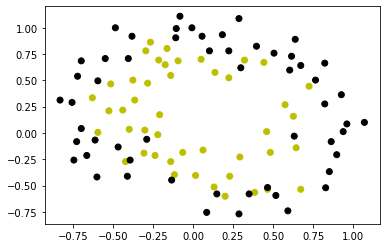

In [ ]:
# Visualize the data
data = pd.read_csv('data_reg_logistic.csv')
x1 = data.iloc[:, 0]
x2 = data.iloc[:, 1]
y = data.iloc[:, 2]

colors = np.where(y==1,'y','k')

plt.scatter(x1, x2, c=colors)
plt.show()

### 2.2 - Feature Mapping

To obtain nonlinear boundary, we map the features into higher dimension.  

**Tasks:**
1. Map the 2-dimension features into all polynomial terms of x1 and x2 up to the 6th power.

 Validation for mapFeature(np.array([[0,1]])) is \
[[1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]]

In [ ]:
# Mapping fuction: def mapFeatures(data, degree):

def mapFeature(data, degrees=6):
    m1 = data[0]
    m2 = data[1]
    X = []
    for i in range(degrees + 1): 
        for j in range(i+1):
            X.append(m1**(i-j) * m2**j) 
    
    return np.array(X)

#testing whether it is correct.
print(mapFeature(np.array([0.0,1.0])))
X = mapFeature([x1,x2])
print(X)

[1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1.]
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 5.12670000e-02 -9.27420000e-02 -2.13710000e-01 ... -4.84450000e-01
  -6.33640000e-03  6.32650000e-01]
 [ 6.99560000e-01  6.84940000e-01  6.92250000e-01 ...  9.99270000e-01
   9.99270000e-01 -3.06120000e-02]
 ...
 [ 6.29470940e-04  1.89305413e-03  1.04882142e-02 ...  2.34007252e-01
   4.00328554e-05  3.51474517e-07]
 [ 8.58939846e-03 -1.39810280e-02 -3.39734512e-02 ... -4.82684337e-01
  -6.31330588e-03 -1.70067777e-08]
 [ 1.17205992e-01  1.03255971e-01  1.10046893e-01 ...  9.95627986e-01
   9.95627986e-01  8.22905998e-10]]


### 2.3 - Cost function and gradient

Implement the cost function and gradient for regularized logistic regression. 

**Tasks:**
1. Implement the "cal_reg_cost" to compute the cost.
2. Implement the "cal_reg_grad" to compute the gradients.
3. Test the the two functions with initial values.

**Validation**: \
  Cost at initial theta : 0.6931471805599442 \
  Gradient at inital theta : \
  [0.05    &nbsp;   0.03146256 &nbsp; 0.03589577 &nbsp;0.06512186 &nbsp;0.01044212\
  0.05812127 &nbsp; 0.02379224 &nbsp; 0.01121763 &nbsp; 0.01050091 &nbsp; 0.04185155\
  0.04795375 &nbsp; 0.00272593 &nbsp; 0.01551233 &nbsp; 0.00339255 &nbsp; 0.05331224\
  0.02385013 &nbsp; 0.00614284 &nbsp; 0.00382781 &nbsp; 0.00746595 &nbsp; 0.00566102\
  0.043769   &nbsp; 0.03690049 &nbsp; 0.00163929 &nbsp; 0.00723665 &nbsp; 0.00091111\
  0.00827412 &nbsp; 0.0017557  &nbsp; 0.05035145]

In [ ]:
# Implement the cost function
theta = np.array(np.zeros(28))
lam = 1

def cal_reg_cost(theta, X, y, lam):
     m = len(y)
     eps = 1e-15
     # compute the hypothesis
     htheta = sigmoid(np.dot(theta, X))
        
     # compute J in three terms
     term1 = np.dot(np.log(htheta), y)
     term2 = np.dot(np.log(1-htheta + eps), (1-y))
     term3 = lam/(2*m) * np.dot(theta, theta)
     J = - (term1 + term2 - term3) / m
     return J

############################################
def cal_reg_grad(theta, X, y, lam):    
     m = len(y)
     # compute the hypothesis
     htheta = sigmoid(np.dot(np.transpose(theta), X))  
     # gradient
     term1 = np.dot((htheta - y), np.transpose(X))
     term2 = (lam / m) * theta
     grad = (term1 + term2) / m             
    # grad[0] -= (lam * theta[0]) /m 
     return grad
         

print ("Cost at inital theta:\n ", str(cal_reg_cost(theta, X, y, lam)))
print ("Gradient at inital theta:\n", str(cal_reg_grad(theta, X, y, lam)))

Cost at inital theta:
  0.6931471805599441
Gradient at inital theta:
 [0.05       0.03146256 0.03589577 0.06512186 0.01044212 0.05812127
 0.02379224 0.01121763 0.01050091 0.04185155 0.04795375 0.00272593
 0.01551233 0.00339255 0.05331224 0.02385013 0.00614284 0.00382781
 0.00746595 0.00566102 0.043769   0.03690049 0.00163929 0.00723665
 0.00091111 0.00827412 0.0017557  0.05035145]


## 2.4 Train parameters with Gradient Descent ##


Train parameters with Gradient Descent.

**Tasks:**
1. Implement GD function to optimize parameters.
2. Print out the best theta and its corresponding cost.


In [ ]:
# Learning and plot
L = 0.001
epochs = 800000  #the number of iterations to perform gradient descent
lam = 1

# Performing Gradient Descent 
for i in range(epochs):
    theta = theta - L * cal_reg_grad(theta, X, y, lam)
    if i < 3:
      print("---Epoch#", i)
      print("Best fit theta: ", str(theta))
      print("Cost function at best fit theta:", str(cal_reg_cost(theta, X, y, lam)))

cost = cal_reg_cost(theta, X, y, lam)
print("Best fit theta: ", str(theta))
print("Cost function at best fit theta: ", cost)


---Epoch# 0
Best fit theta:  [-5.00000000e-05 -3.14625580e-05 -3.58957700e-05 -6.51218577e-05
 -1.04421167e-05 -5.81212666e-05 -2.37922390e-05 -1.12176321e-05
 -1.05009072e-05 -4.18515520e-05 -4.79537494e-05 -2.72592921e-06
 -1.55123328e-05 -3.39254609e-06 -5.33122440e-05 -2.38501348e-05
 -6.14284478e-06 -3.82780648e-06 -7.46594607e-06 -5.66102417e-06
 -4.37690001e-05 -3.69004876e-05 -1.63928681e-06 -7.23665148e-06
 -9.11107182e-07 -8.27412363e-06 -1.75570322e-06 -5.03514495e-05]
Cost function at best fit theta: 0.6931200734966677
---Epoch# 1
Best fit theta:  [-9.99660822e-05 -6.29183160e-05 -7.17765745e-05 -1.30233520e-04
 -2.08834576e-05 -1.16227186e-04 -4.75793869e-05 -2.24328005e-05
 -2.10003873e-05 -8.36915378e-05 -9.59013358e-05 -5.45123637e-06
 -3.10222667e-05 -6.78472665e-06 -1.06612952e-04 -4.76960805e-05
 -1.22846398e-05 -7.65487376e-06 -1.49305441e-05 -1.13214432e-05
 -8.75278141e-05 -7.37963331e-05 -3.27811875e-06 -1.44723651e-05
 -1.82197452e-06 -1.65469460e-05 -3.51118308